In [1]:
import sys
#sys.path.append(ocelot_dir)
sys.path.insert(1, "../")
from s2e_sections.sections import *
from ocelot.utils.section_track import *
from ocelot.gui.accelerator import *
from ocelot.common.globals import *
from ocelot import *

import lattices.longlist_2024_07_04.i1_track as i1
import lattices.longlist_2024_07_04.l1 as l1
import lattices.longlist_2024_07_04.l2_special_optics as l2_special
import lattices.longlist_2024_07_04.b2d_special_optics as b2d_special
import lattices.longlist_2024_07_04.l2 as l2
import lattices.longlist_2024_07_04.b2d as b2d

method = {'global': TransferMap}

i1.tws0.s = 0

initializing ocelot...


In [7]:
import bolko_optics as bolko

In [2]:
def print_twiss(twiss_list, name):
    tws = next(tws for tws in twiss_list if tws.id == name)
    print(f"""Twiss, 
          name = {tws.id}
          betax = {tws.beta_x}
          betay = {tws.beta_y}
          alphax = {tws.alpha_x}
          alphay = {tws.alpha_y}
          Dy = {tws.Dy}
          """)


In [3]:
#bc2_stop = l2.tora_415_b2
b2d_stop =l2.otrb_454_b2

cathode_to_tds_middle = MagneticLattice(i1.cell+l1.cell+l2.cell+b2d.cell, stop=b2d_stop, method=method)
design_twiss = twiss(lattice=cathode_to_tds_middle, tws0=i1.tws0)

print_twiss(design_twiss, "MATCH.52.I1")
#print_twiss(design_twiss, "MARKER.TDS.B2")
print_twiss(design_twiss, "OTRB.454.B2")


Twiss, 
          name = MATCH.52.I1
          betax = 3.1316852790764442
          betay = 5.417481144487618
          alphax = -0.9249295920894705
          alphay = 1.730097559841181
          Dy = 0.0
          
Twiss, 
          name = OTRB.454.B2
          betax = 16.948741766458742
          betay = 6.051097685988678
          alphax = -2.1533965597825864
          alphay = 1.0064201052359751
          Dy = -3.6317514696083026e-07
          


29.382633052459628


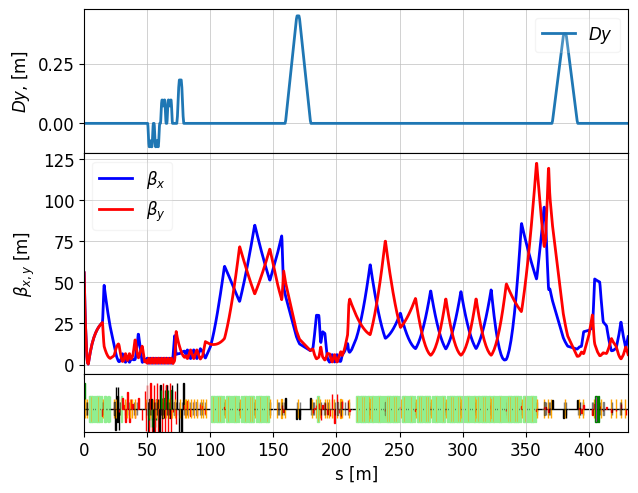

In [5]:
tds = l2.marker_tds_b2

B, R, T = cathode_to_tds_middle.transfer_maps(start=tds, stop=b2d_stop, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_tds_middle, design_twiss, top_plot=["Dy"],legend=False)
#plt.xlim(400, 452)
#plt.axvline(450.741556)

In [4]:
x83_strengths = {}
cathode_to_otra_b2d = MagneticLattice(i1.cell+l1.cell+l2.cell+b2d.cell, stop=b2d.otra_473_b2d, method=method)
with open("../BEAM_B2D.txt", "r") as f:
    for line in f:
        name, strength = line.split()
        strength = float(strength)
        x83_strengths[name] = strength
#print(x83_strengths)

nina_names_to_elements = {}
for element in cathode_to_otra_b2d.sequence:
    if isinstance(element, (Marker, Drift, Solenoid, Hcor, Vcor, Monitor, Undulator, Cavity, Sextupole)):
        continue
    ps_name = element.ps_id
    if isinstance(element, (Quadrupole)):# and (ps_name[-2:]=='B2' or ps_name[-3:]=='B2D'):
        try:
            element.k1 = x83_strengths[ps_name] / element.l
            print(f'changed element {ps_name}')
        except KeyError:
            continue#print("Skipping ", element, type(element))
    else:
        continue
machine_twiss_nina_x83 = twiss(lattice=cathode_to_otra_b2d, tws0=i1.tws0)

print_twiss(machine_twiss_nina_x83, "MATCH.52.I1")
print_twiss(machine_twiss_nina_x83, "MARKER.TDS.B2")
print_twiss(machine_twiss_nina_x83, "OTRA.473.B2D")


changed element Q.A1.1.I1
changed element Q.AH1.1.I1
changed element QI.1.I1
changed element QI.2.I1
changed element QI.3.I1
changed element QI.4.I1
changed element QI.5.I1
changed element QI.6.I1
changed element QI.7.I1
changed element QI.8.I1
changed element QI.9.I1
changed element QI.11.I1
changed element QI.12.I1
changed element QI.13.I1
changed element QI.14.I1
changed element QI.15.I1
changed element QI.16.I1
changed element QI.17.I1
changed element QI.18.I1
changed element QI.19.I1
changed element QI.20.I1
changed element QI.19.I1
changed element QI.18.I1
changed element QI.19.I1
changed element QI.20.I1
changed element QI.21.I1
changed element QI.22.I1
changed element QI.21.I1
changed element QI.24.I1
changed element QI.23.I1
changed element QI.22.I1
changed element QI.23.I1
changed element QI.24.I1
changed element QI.23.I1
changed element QI.25.I1
changed element QI.26.I1
changed element QI.27.I1
changed element QI.28.I1
changed element QI.29.I1
changed element QI.30.I1
change

140.41475348813964


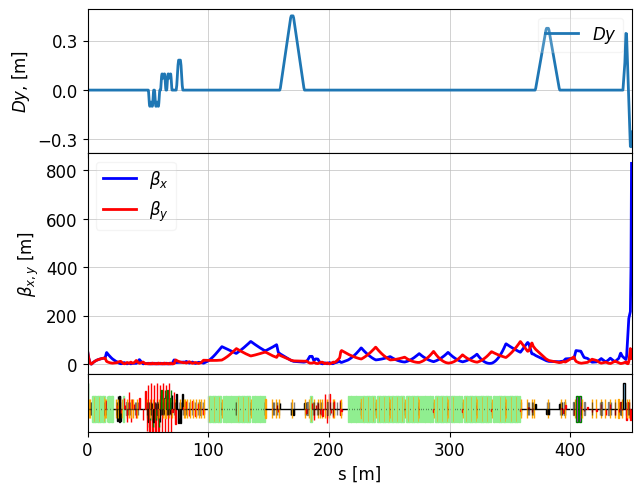

In [5]:
tds = l2.marker_tds_b2
screen = b2d.otra_473_b2d
B, R, T = cathode_to_otra_b2d.transfer_maps(start=tds, stop=screen, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_otra_b2d, machine_twiss_nina_x83, top_plot=["Dy"], legend=False)

In [3]:
x83_strengths = {}
cathode_to_otra_b2d_1 = MagneticLattice(i1.cell+l1.cell+l2.cell+b2d.cell, stop=b2d.otra_473_b2d, method=method)
with open("../BC2_TDS.txt", "r") as f:
    for line in f:
        name, strength = line.split()
        strength = float(strength)
        x83_strengths[name] = strength
#print(x83_strengths)

nina_names_to_elements = {}
for element in cathode_to_otra_b2d_1.sequence:
    if isinstance(element, (Marker, Drift, Solenoid, Hcor, Vcor, Monitor, Undulator, Cavity, Sextupole)):
        continue
    ps_name = element.ps_id
    if isinstance(element, (Quadrupole)) and (ps_name[-2:]=='B2' or ps_name[-3:]=='B2D'):
        try:
            element.k1 = x83_strengths[ps_name] / element.l
            print(f'changed element {ps_name}')
        except KeyError:
            continue#print("Skipping ", element, type(element))
    else:
        continue
machine_twiss_nina_x83_1 = twiss(lattice=cathode_to_otra_b2d_1, tws0=i1.tws0)

print_twiss(machine_twiss_nina_x83_1, "MATCH.52.I1")
print_twiss(machine_twiss_nina_x83_1, "MARKER.TDS.B2")
print_twiss(machine_twiss_nina_x83_1, "OTRA.473.B2D")


changed element QD.1.B2
changed element QD.2.B2
changed element QD.3.B2
changed element QD.4.B2
changed element QD.6.B2
changed element QD.7.B2
changed element QD.8.B2
changed element QD.9.B2
changed element QD.10.B2
changed element QD.11.B2
changed element QD.12.B2
changed element QD.13.B2
changed element QD.14.B2
changed element QD.15.B2
changed element QD.16.B2
changed element QD.17.B2
changed element QD.18.B2
changed element QD.19.B2
changed element QD.21.B2
changed element QD.22.B2
changed element QD.23.B2
changed element QF.31.B2D
changed element QE.32.B2D
changed element QF.33.B2D
Twiss, 
          name = MATCH.52.I1
          betax = 3.1316852790764442
          betay = 5.417481144487618
          alphax = -0.9249295920894705
          alphay = 1.730097559841181
          Dy = 0.0
          
Twiss, 
          name = MARKER.TDS.B2
          betax = 201.1930793992964
          betay = 9.553978338162128
          alphax = 0.16458201672730957
          alphay = 1.6223612703713457
 

-21.26369765005116


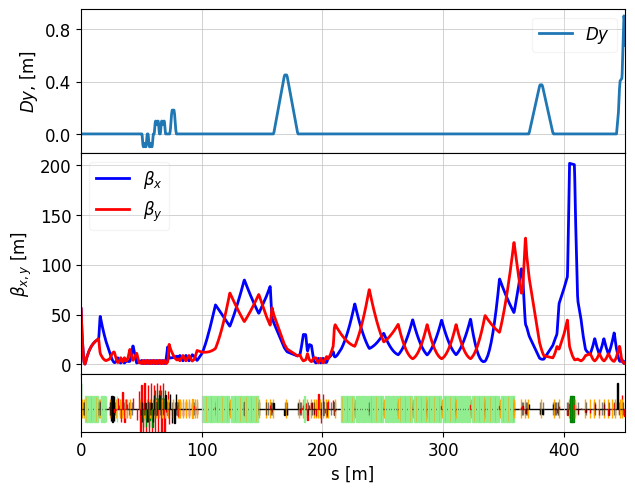

In [4]:
tds = l2.marker_tds_b2
screen = b2d.otra_473_b2d
B, R, T = cathode_to_otra_b2d_1.transfer_maps(start=tds, stop=screen, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_otra_b2d_1, machine_twiss_nina_x83_1, top_plot=["Dy"], legend=False)

In [7]:
cathode_to_otra_b2d_1.save_as_py_file('bolko_optics.py', tws0=i1.tws0, power_supply=True)

In [ ]:
import bolko_optics as bolko

In [ ]:
x83_strengths = {}
#cathode_to_otra_b2d_2 = MagneticLattice(i1.cell+l1.cell+l2.cell+b2d.cell, stop=b2d.otra_473_b2d, method=method)
cathode_to_otra_b2d_2 = MagneticLattice(bolko, method=method)
with open("../BC2_TDS_HIGH_ET_RES.txt", "r") as f:
    for line in f:
        name, strength = line.split()
        strength = float(strength)
        x83_strengths[name] = strength
#print(x83_strengths)

nina_names_to_elements = {}
for element in cathode_to_otra_b2d_2.sequence:
    if isinstance(element, (Marker, Drift, Solenoid, Hcor, Vcor, Monitor, Undulator, Cavity, Sextupole)):
        continue
    ps_name = element.ps_id
    if isinstance(element, (Quadrupole)) and (ps_name[-2:]=='B2' or ps_name[-3:]=='B2D'):
        try:
            element.k1 = x83_strengths[ps_name] / element.l
            print(f'changed element {ps_name}')
        except KeyError:
            continue#print("Skipping ", element, type(element))
    else:
        continue
machine_twiss_nina_x83_2 = twiss(lattice=cathode_to_otra_b2d_2, tws0=i1.tws0)

print_twiss(machine_twiss_nina_x83_2, "MATCH.52.I1")
print_twiss(machine_twiss_nina_x83_2, "MARKER.TDS.B2")
print_twiss(machine_twiss_nina_x83_2, "OTRA.473.B2D")


changed element QD.1.B2
changed element QD.2.B2
changed element QD.3.B2
changed element QD.4.B2
changed element QD.6.B2
changed element QD.7.B2
changed element QD.8.B2
changed element QD.9.B2
changed element QD.10.B2
changed element QD.11.B2
changed element QD.12.B2
changed element QD.13.B2
changed element QD.14.B2
changed element QD.15.B2
changed element QD.16.B2
changed element QD.17.B2
changed element QD.18.B2
changed element QD.19.B2
changed element QD.21.B2
changed element QD.22.B2
changed element QD.23.B2
changed element QF.31.B2D
changed element QE.32.B2D
changed element QF.33.B2D
Twiss, 
          name = MATCH.52.I1
          betax = 3.1316852790764442
          betay = 5.417481144487618
          alphax = -0.9249295920894705
          alphay = 1.730097559841181
          Dy = 0.0
          
Twiss, 
          name = MARKER.TDS.B2
          betax = 201.1930793992964
          betay = 9.553978338162128
          alphax = 0.16458201672730957
          alphay = 1.6223612703713457
 

-24.181410661121397


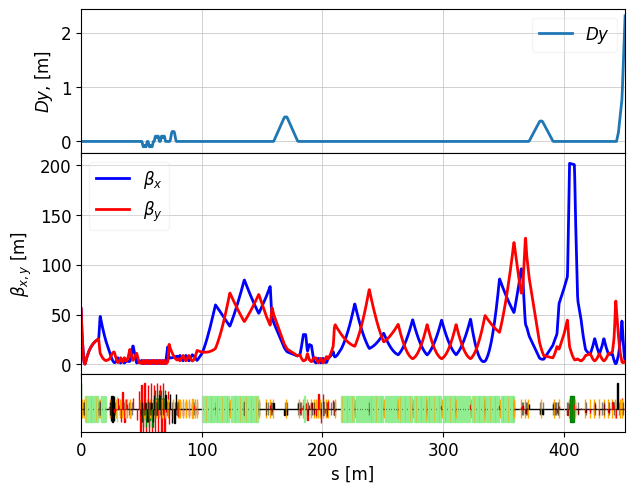

In [4]:
tds = l2.marker_tds_b2
screen = b2d.otra_473_b2d
_, R, _ = cathode_to_otra_b2d_2.transfer_maps(start=tds, stop=screen, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_otra_b2d_2, machine_twiss_nina_x83_2, top_plot=["Dy"], legend=False)

plt.show()

Twiss, 
          name = MATCH.52.I1
          betax = 3.131735359530278
          betay = 4.736385241759401
          alphax = -0.9249736460253934
          alphay = 1.6884747073330721
          Dy = 0.0
          
Twiss, 
          name = MARKER.TDS.B2
          betax = 54.52756921671762
          betay = 6.4166548331325854
          alphax = 0.32543844206991224
          alphay = 0.9569087096618166
          Dy = 5.239325530360559e-07
          
Twiss, 
          name = OTRA.473.B2D
          betax = 3.2681142577765874
          betay = 2.0477944494743894
          alphax = 3.0670088665415802
          alphay = -0.4986812118556937
          Dy = 2.2513360087780527
          
-12.479212821660369


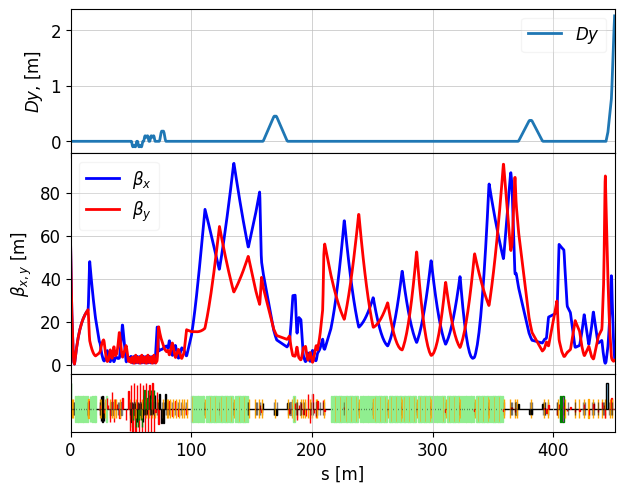

In [13]:
cathode_to_otra_b2d_3 = MagneticLattice(i1.cell+l1.cell+l2_special.cell+b2d_special.cell, stop=b2d_special.otra_473_b2d, method=method)

machine_twiss_nina_x83_3 = twiss(lattice=cathode_to_otra_b2d_3, tws0=i1.tws0)

print_twiss(machine_twiss_nina_x83_3, "MATCH.52.I1")
print_twiss(machine_twiss_nina_x83_3, "MARKER.TDS.B2")
print_twiss(machine_twiss_nina_x83_3, "OTRA.473.B2D")

tds = l2_special.marker_tds_b2
screen = b2d_special.otra_473_b2d
_, R, _ = cathode_to_otra_b2d_3.transfer_maps(start=tds, stop=screen, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_otra_b2d_3, machine_twiss_nina_x83_3, top_plot=["Dy"], legend=False)

plt.show()

In [8]:
x83_strengths = {}
#cathode_to_otra_b2d_2 = MagneticLattice(i1.cell+l1.cell+l2.cell+b2d.cell, stop=b2d.otra_473_b2d, method=method)
cathode_to_otra_b2d_2 = MagneticLattice(bolko.cell, method=method)
with open("../BC2_TDS_HIGH_ET_RES.txt", "r") as f:
    for line in f:
        name, strength = line.split()
        strength = float(strength)
        x83_strengths[name] = strength
#print(x83_strengths)

x83_quad_k1 = {'QD.459.B2': -0.6010,
          'QD.463.B2': +1.3346,
          'QD.464.B2': +0.7416,
          'QD.465.B2': -1.7783,
          'QF.469.B2D': 0.0,
          'QE.471.B2D': +2.05,
          'QF.472.B2D': -0.096}
nina_names_to_elements = {}
for element in cathode_to_otra_b2d_2.sequence:
    if isinstance(element, (Marker, Drift, Solenoid, Hcor, Vcor, Monitor, Undulator, Cavity, Sextupole, TDCavity)):
        continue
    ps_name = element.ps_id
    if isinstance(element, (Quadrupole)) and (element.id in x83_quad_k1):
        try:
            element.k1 = x83_quad_k1[element.id]
            element_k1l = element.k1 * element.l
            print(f'changed element {ps_name}: k1l, {element_k1l}')
        except KeyError:
            continue#print("Skipping ", element, type(element))
    else:
        continue
machine_twiss_nina_x83_2 = twiss(lattice=cathode_to_otra_b2d_2, tws0=i1.tws0)

print_twiss(machine_twiss_nina_x83_2, "MATCH.52.I1")
print_twiss(machine_twiss_nina_x83_2, "MARKER.TDS.B2")
print_twiss(machine_twiss_nina_x83_2, "OTRA.473.B2D")

changed element QD.19.B2: k1l, -0.14225669999999999
changed element QD.21.B2: k1l, 0.31589982
changed element QD.22.B2: k1l, 0.17553672
changed element QD.23.B2: k1l, -0.42092361
changed element QF.31.B2D: k1l, 0.0
changed element QE.32.B2D: k1l, 0.49199999999999994
changed element QF.33.B2D: k1l, -0.051081600000000005
Twiss, 
          name = MATCH.52.I1
          betax = 3.1316852790764442
          betay = 5.417481144487618
          alphax = -0.9249295920894705
          alphay = 1.730097559841181
          Dy = 0.0
          
Twiss, 
          name = MARKER.TDS.B2
          betax = 201.1930793992964
          betay = 9.553978338162128
          alphax = 0.16458201672730957
          alphay = 1.6223612703713457
          Dy = 4.867800171454955e-07
          
Twiss, 
          name = OTRA.473.B2D
          betax = 3.29001647900875
          betay = 2.875941596636404
          alphax = 3.1903980471656244
          alphay = -0.7623270483630085
          Dy = 2.2513356354404888
       

-25.584853494547602


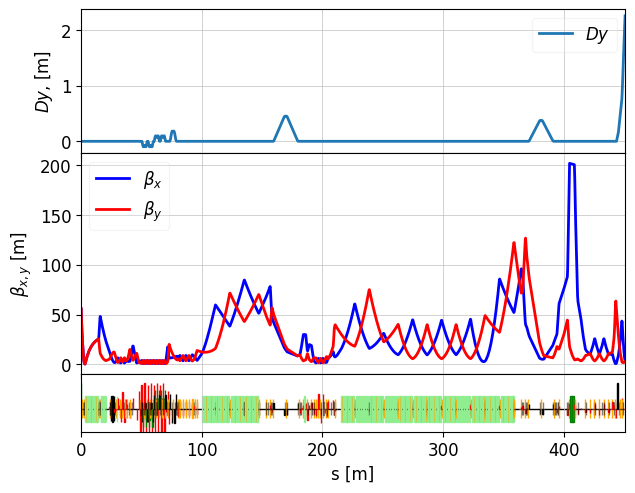

In [9]:
tds = bolko.marker_tds_b2
screen = bolko.otra_473_b2d
_, R, _ = cathode_to_otra_b2d_2.transfer_maps(start=tds, stop=screen, energy=2.4)
print(R[0,1])
plot_opt_func(cathode_to_otra_b2d_2, machine_twiss_nina_x83_2, top_plot=["Dy"], legend=False)

plt.show()

In [9]:
cathode_to_otra_b2d_2.save_as_py_file('high_energy_res_optics.py', tws0=i1.tws0, power_supply=True)